In [13]:
import random
import numpy as np
from datetime import datetime
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

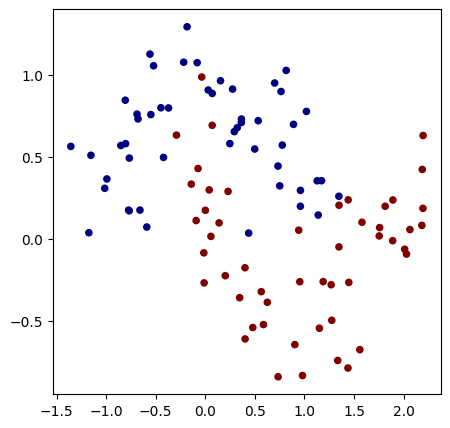

In [124]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.2)
y = y*2 - 1
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [125]:
model = MLP(2, [16, 16, 1])
print(model)
print(f'num of params = {len(model.parameters())}')

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), Layer of [LinearNeuron(16)]
num of params = 337


In [126]:
def loss(batch_size = None, X = None, y = None):
    Xb, yb = [], []
    if batch_size is None:
        Xb, yb = X,y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    scores = list(map(model, inputs))
    
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses)*(1.0 / len(losses))
    
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy)/len(accuracy)

In [127]:
total_loss, acc = loss(X = X, y = y)
print(f'loss {total_loss} accuracy = {acc}')

loss Value(data=1.2552305874280607, grad=0.0000) accuracy = 0.33


In [128]:
for k in range(50):
    total_loss, acc = loss(X = X, y = y)
    
    model.zero_grad()
    total_loss.backward()
    
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k%1 == 0:
        print(f'step {k} loss {total_loss.data} accuracy {acc*100}%')

step 0 loss 1.2552305874280607 accuracy 33.0%
step 1 loss 1.0382584854972194 accuracy 71.0%
step 2 loss 0.4346784193554094 accuracy 81.0%
step 3 loss 0.3364918761813825 accuracy 84.0%
step 4 loss 0.29671056383478567 accuracy 87.0%
step 5 loss 0.27593519966803787 accuracy 89.0%
step 6 loss 0.29337442388487345 accuracy 85.0%
step 7 loss 0.31272881089302945 accuracy 92.0%
step 8 loss 0.6331330562661779 accuracy 79.0%
step 9 loss 0.7302456748039376 accuracy 78.0%
step 10 loss 0.3543020581402777 accuracy 84.0%
step 11 loss 0.30105817364648607 accuracy 87.0%
step 12 loss 0.2788372498568694 accuracy 87.0%
step 13 loss 0.2631413881656881 accuracy 87.0%
step 14 loss 0.24786962026924164 accuracy 88.0%
step 15 loss 0.23684613819544872 accuracy 89.0%
step 16 loss 0.2280985364222991 accuracy 89.0%
step 17 loss 0.21942296071529963 accuracy 90.0%
step 18 loss 0.2180247782494109 accuracy 91.0%
step 19 loss 0.22254322453278297 accuracy 93.0%
step 20 loss 0.3274481700483869 accuracy 89.0%
step 21 loss 0

(-1.500290448640939, 1.999709551359061)

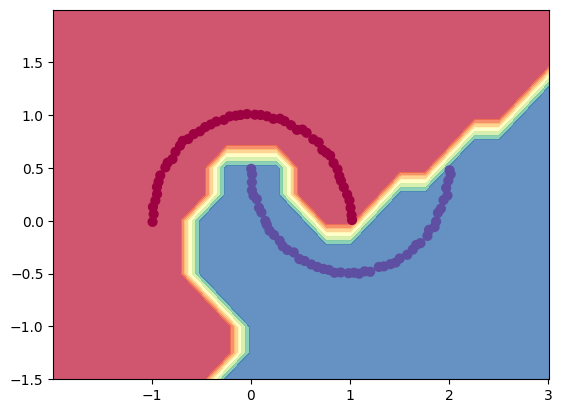

In [122]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())